In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [2]:
# Read in the RACMO nc file

RACMO = nc.Dataset('Derwael_SMB.nc')
smb_RACMO = np.array(RACMO.variables['smb'][:])
X_R = np.array(RACMO.variables['x'][:])
Y_R = np.array(RACMO.variables['y'][:])


In [3]:
# Read in the n=3 dsdt-adjusted 

n3 = nc.Dataset('../Simulations/DerwaelSimulations/dsdt_adjustment/Derwael_SMB_dsdt_adjustment_n3E0.5Time50.nc')
smb_n3 = np.array(n3.variables['smb'][:])
X_n = np.array(n3.variables['x'][:])
Y_n = np.array(n3.variables['y'][:])


In [4]:
# Read in the n=4 dsdt-adjusted 

n4 = nc.Dataset('../Simulations/DerwaelSimulations/dsdt_adjustment/Derwael_SMB_dsdt_adjustment_n4E1.8Time50.nc')
smb_n4 = np.array(n4.variables['smb'][:])


In [5]:
# Read in the combined data without any dsdt adjustment

intp = nc.Dataset('Derwael_SMB_Combined_IceEquiv.nc') 
smb_intp = np.array(intp.variables['smb'][:])


In [6]:
# Read in grounding line

dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

hull_pts = hull_pts

for i in range(len(hull_pts[0])):
    hull_pts[0][i] = hull_pts[0][i]/1000
    hull_pts[1][i] = hull_pts[1][i]/1000


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [7]:
# Subtract the datasets

n3_diff = smb_n3 - smb_RACMO.T
n4_diff = smb_n4 - smb_RACMO.T
n3_intp_diff = smb_n3 - smb_intp
n4_intp_diff = smb_n4 - smb_intp
n4_n3_diff = smb_n4 - smb_n3
intp_RACMO = smb_intp - smb_RACMO.T


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/1444121595.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


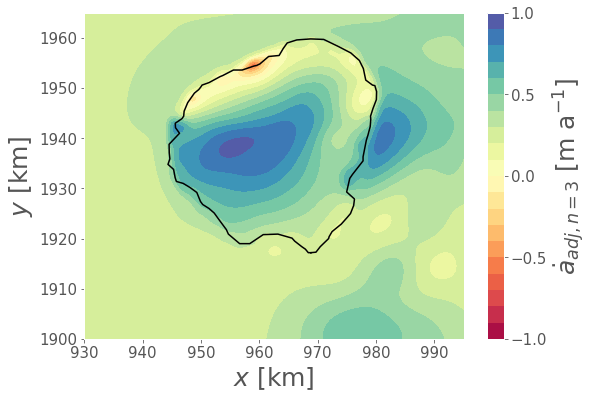

In [40]:
# Plot n=3 SMB

fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
levels = np.linspace(-1.0, 1.0, 21)
CS = ax.contourf(X_n/1000, Y_n/1000, smb_n3, levels=levels, cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\dot{a}_{adj, n=3}$ [m a$^{-1}$]', rotation=90, size=25)

fig.savefig('../Figures/SMBn3.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/2255569894.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


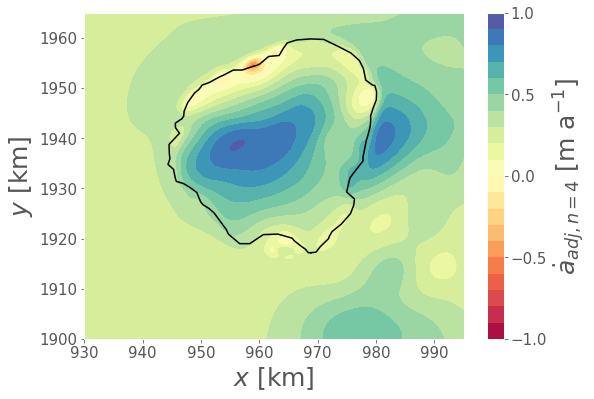

In [78]:
# Plot n=4 SMB

fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
levels = np.linspace(-1.0, 1.0, 21)
CS = ax.contourf(X_n/1000, Y_n/1000, smb_n4, levels=levels, cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\dot{a}_{adj, n=4}$ [m a$^{-1}$]', rotation=90, size=25)

fig.savefig('../Figures/SMBn4.jpg', format='jpg', dpi=700, bbox_inches = "tight")

/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/50189033.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


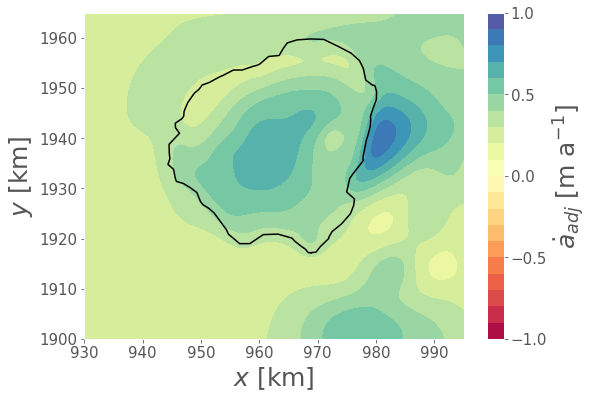

In [77]:
# Plot combined SMB

fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
levels = np.linspace(-1.0, 1.0, 21)
CS = ax.contourf(X_n/1000, Y_n/1000, smb_intp, levels=levels, cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\dot{a}_{adj}$ [m a$^{-1}$]', rotation=90, size=25)

fig.savefig('../Figures/SMB_intp.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/399476321.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


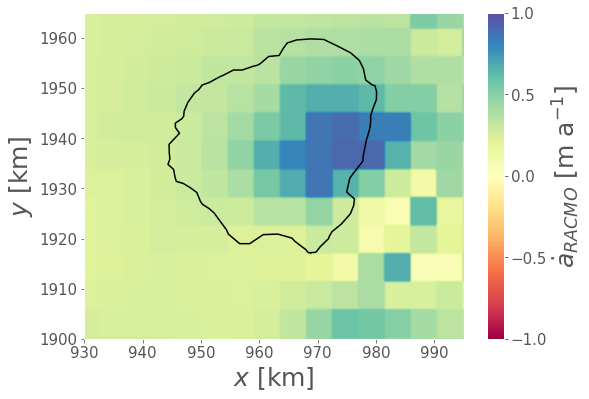

In [80]:
# Plot difference

fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
CS = ax.contourf(X_n/1000, Y_n/1000, smb_RACMO.T, levels=np.linspace(-1.0,1.0,500), cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.set_label('$\dot{a}_{RACMO}$ [m a$^{-1}$]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/SMBRACMO.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/2728330545.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


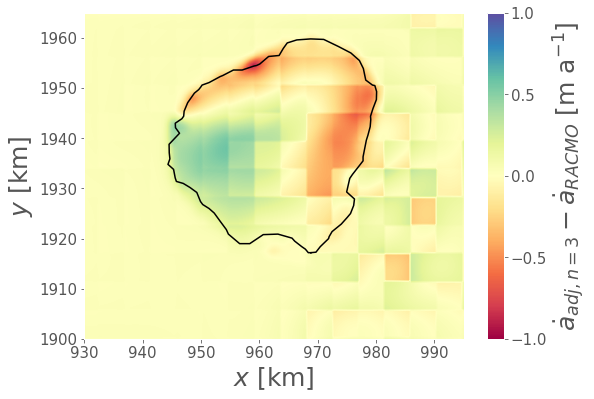

In [68]:


fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
CS = ax.contourf(X_n/1000, Y_n/1000, n3_diff, levels=np.linspace(-1.0,1.0,500), cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.set_label('$\dot{a}_{adj, n=3} - \dot{a}_{RACMO}$ [m a$^{-1}$]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/SMBn3_diff.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/4021711279.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


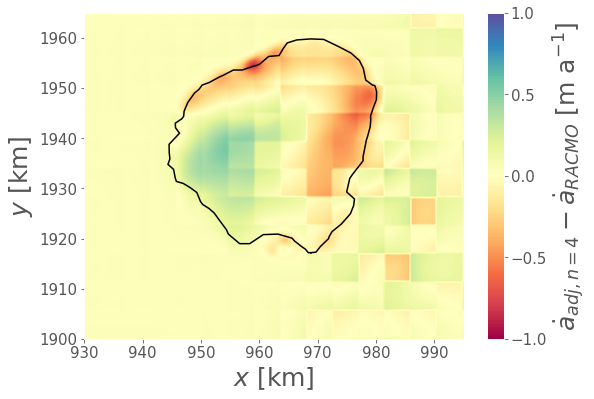

In [55]:


fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
CS = ax.contourf(X_n/1000, Y_n/1000, n4_diff, levels=np.linspace(-1.0,1.0,500), cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.set_label('$\dot{a}_{adj, n=4} - \dot{a}_{RACMO}$ [m a$^{-1}$]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/SMBn4_diff.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/707844925.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


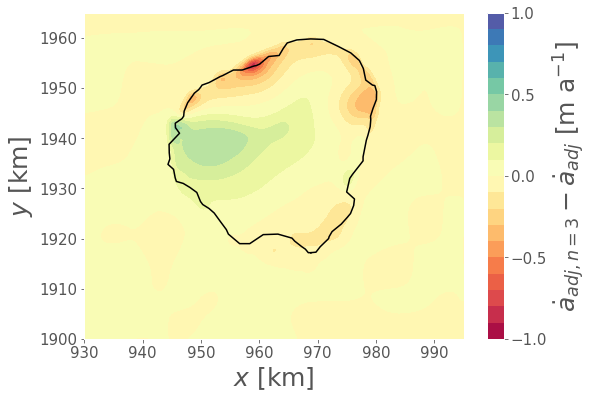

In [56]:


fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
CS = ax.contourf(X_n/1000, Y_n/1000, n3_intp_diff, levels=np.linspace(-1.0,1.0,21), cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.set_label('$\dot{a}_{adj, n=3} - \dot{a}_{adj}$ [m a$^{-1}$]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/SMBn3_intp_diff.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/2314046468.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


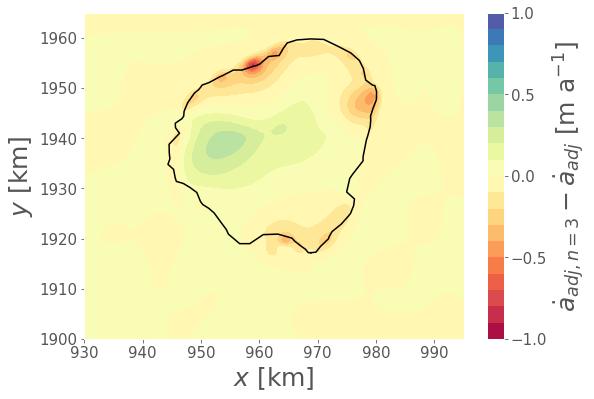

In [79]:


fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
CS = ax.contourf(X_n/1000, Y_n/1000, n4_intp_diff, levels=np.linspace(-1.0,1.0,21), cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.set_label('$\dot{a}_{adj, n=3} - \dot{a}_{adj}$ [m a$^{-1}$]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/SMBn4_intp_diff.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/2845913378.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-0.2, -0.1, 0.0, 0.1, 0.2])


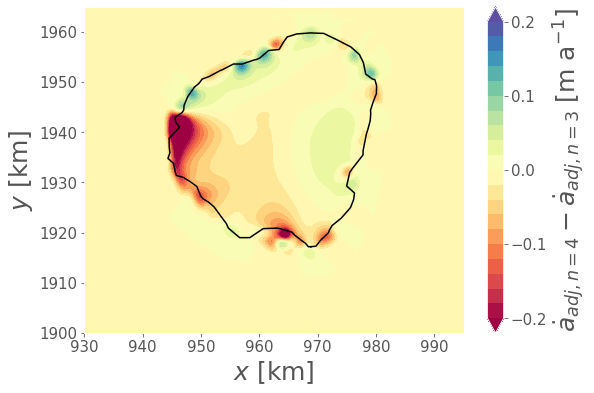

In [74]:


fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
CS = ax.contourf(X_n/1000, Y_n/1000, n4_n3_diff, levels=np.linspace(-0.2,0.2,21), cmap="Spectral", extend="both")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-0.2, -0.1, 0.0, 0.1, 0.2])
cbar.set_label('$\dot{a}_{adj, n=4} - \dot{a}_{adj, n=3}$ [m a$^{-1}$]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/SMBn4_n3_diff.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_77201/3171598739.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])


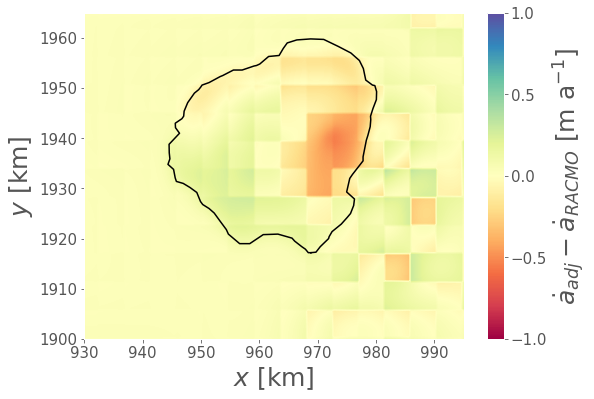

In [76]:


fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
CS = ax.contourf(X_n/1000, Y_n/1000, intp_RACMO, levels=np.linspace(-1.0,1.0,500), cmap="Spectral")
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
cbar.set_label('$\dot{a}_{adj} - \dot{a}_{RACMO}$ [m a$^{-1}$]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/SMBintp_RACMO.jpg', format='jpg', dpi=700, bbox_inches = "tight")
